# SPIN 1 - VL05 -- Gravitation und Leapfrog: Das Sonnensystem

In [56]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
# GMsun = k^2
k = 0.01720209895

#Datum = 18.03.08 00:00:00.0000,    2454543.500000000 = A.D.
day = 2454543.500000000

In [61]:
class Body:
    def __init__(self, mass, r, v, f):
        self.r = r
        self.v = v
        self.f = f
        self.mass = mass

sonne =  Body( 1.0, 
                [-3.402962055191472E-04, 4.973801475460748E-03,-6.230136454608636E-05], 
                [-6.477668621023070E-06,-1.292580409219799E-07, 1.154585032962209E-07], 
                [0,0,0])
merkur = Body( 1.0/6023600, 
                [3.704735169720974E-02,-4.529211095852149E-01,-4.090255306376755E-02], 
                [2.239183874467135E-02, 3.736008439029809E-03,-1.750026916388115E-03], 
                [0,0,0])
venus = Body( 1.0/408523.61,  
                [4.272157290820016E-01,-5.835752726996720E-01,-3.279422047835795E-02], 
                [1.622328987696207E-02, 1.181629954076840E-02,-7.748242818668279E-04], 
                [0,0,0])
erdemond = Body( 1.0/332946.050895,
                [-9.948486972722731E-01, 4.564231864395614E-02,-6.099525188647536E-05],
                [-9.901408163678924E-04,-1.725450198017297E-02, 4.346241632445323E-07], 
                [0,0,0])
mars = Body( 1.0/3098708,
                [-1.093539305796724E+00, 1.240381444357973E+00, 5.266905384900308E-02],
                [-9.958470942542191E-03,-8.082316351751016E-03, 7.520708651107539E-05], 
                [0,0,0])
jupiter = Body( 1.0/1047.3486,
                [7.199075962861715E-01,-5.164765414047316E+00, 5.281301305052329E-03],
                [7.380707839356994E-03, 1.399344086177555E-03,-1.710023430451413E-04], 
                [0,0,0])
saturn = Body( 1.0/3497.898,
                [-8.469664737705321E+00, 3.804527121928150E+00, 2.708474727487031E-01],
                [-2.583089539225567E-03,-5.101976771205786E-03, 1.915567842416982E-04], 
                [0,0,0])
uranus = Body( 1.0/22902.98,
                [1.970001443062262E+01,-3.956376098536538E+00,-2.699288868040702E-01],
                [7.457402740600397E-04, 3.672797797089092E-03, 3.988780204062304E-06], 
                [0,0,0])
neptun = Body( 1.0/19412.24,
                [2.361441531200179E+01,-1.856288724958460E+01,-1.619425696998957E-01],
                [1.919278314221217E-03, 2.486348363416270E-03,-9.543324154983418E-05], 
                [0,0,0])
pluto = Body( 1.0/135200000,
                [-4.656585770964581E-01,-3.123136435608064E+01, 3.476634650132539E+00],
                [3.195935187090267E-03,-6.368370346118488E-04,-8.563102596919757E-04], 
                [0,0,0])

T_sonne = 
T_merkur = 88/2
T_venus = 226/2
T_erde = 366/2
T_mars = 690/2
T_jupiter = int(11.863*365/2)
T_saturn = int(29.459*365/2)
T_uranus = int(84.015*365/2)
T_neptun = int(164.794*365/2)
T_pluto = int(247.95*365/2)

print(neptun.r[1])
planeten = [sonne, merkur, venus, erdemond, mars, jupiter, saturn, uranus, neptun]
N = len(planeten)
h = 2.0
data = [[[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], 
        [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]]]
def update_forces():
    for p in planeten:
        for l in range(0,3):
            p.f[l] = 0.0
    for i in range(0,N-1):
        for j in range(i+1,N):
            d2 = 0.0
            ir = 0.0
            ir3 = 0.0
            
            d = [0,0,0]
            for l in range(0,3):
                d[l] = planeten[j].r[l] - planeten[i].r[l]
                d2 += d[l]*d[l]
            ir = 1.0 / math.sqrt(d2)
            ir3 = ir*ir*ir
            ir3 *= planeten[i].mass * planeten[j].mass
            ir3 *= k*k
            for l in range(0,3):
                planeten[i].f[l] += ir3 * d[l]
                planeten[j].f[l] -= ir3 * d[l]

        
        
for iteration in range(0,500):
    for p in planeten:
        for n in range(0,3):
            p.r[n] += 0.5 * h * p.v[n]
            
    update_forces()
    
    for p in planeten:
        for n in range(0,3):
            p.v[n] +=  h * (p.f[n] / p.mass)
        #print(str(p.f[0]))
    
    for p in range(0,N):
        for n in range(0,3):
            planeten[p].r[n] += 0.5 * h * planeten[p].v[n]
        for n in range(0,3):
            data[p][n].append(planeten[p].r[n])

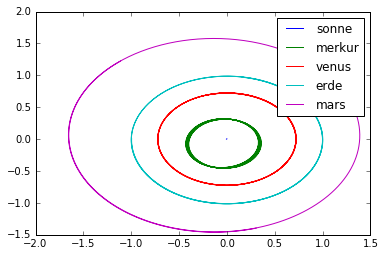

In [62]:
plt.plot(data[0][0], data[0][1], '-', label = 'sonne')
plt.plot(data[1][0], data[1][1], '-', label = 'merkur')
plt.plot(data[2][0], data[2][1], '-', label = 'venus')
plt.plot(data[3][0], data[3][1], '-', label = 'erde')
plt.plot(data[4][0], data[4][1], '-', label = 'mars')

plt.legend(loc='upper right')